# Example Spectra to run show Recovery techniques:

In [11]:
from __future__ import division, print_function
from __future__ import absolute_import, unicode_literals

import numpy as np
import scipy
import bokeh
import matplotlib.pyplot as plt

%matplotlib inline

# Import Bokeh modules for interactive plotting
import bokeh.io
import bokeh.mpl
import bokeh.plotting
# Include masking
from bokeh.plotting import figure, show, output_file, gridplot, vplot
from bokeh.models import BoxAnnotation
from bokeh.models import Range1d



# This enables SVG graphics inline.  There is a bug, so uncomment if it works.
%config InlineBackend.figure_formats = {'svg',}

# This enables high resolution PNGs. SVG is preferred, but has problems
# rendering vertical and horizontal lines
#%config InlineBackend.figure_formats = {'png', 'retina'}

# Set up Bokeh for inline viewing
bokeh.io.output_notebook()

Loading BokehJS ...

In [12]:
# Gaussian lines 
from astropy.modeling import models, fitting
#from astropy.modeling import SummedCompositeModel
from astropy.modeling.models import Gaussian1D
#from astropy.modeling.models import custom_model_1d

## my functions:
    #x = np.linspace(0, 100, points)
def mk_gaussian_sum(x, amplitudes, means, stddevs, noise=1/200):
    '''Create 3 spectral lines by adding 3 gaussians together'''
    assert len(amplitudes) == len(means), ' Not the same length inputs'
    assert len(amplitudes) == len(stddevs), ' Not the same length inputs'
    y = np.ones_like(x)
    for i in range(len(amplitudes)):
        g = Gaussian1D(amplitude=amplitudes[i], mean=means[i], stddev=stddevs[i])
        # print g(x)
        y -= g(x) # Adding each Gaussian  
    y +=  np.random.normal(0, noise, x.shape)		# Adding some noise to our data

    return y

In [13]:
# Wavelength range
wavelength = np.linspace(2110, 2113, 50)
stellar_amp = [.4, .5]
stellar_means = [2111.2, 2112.5]
stellar_stddevs = [.1, .06]
stellar_lines = mk_gaussian_sum(wavelength, stellar_amp, stellar_means, stellar_stddevs,  noise=1/150)

telluric_amp = [.1, .3, .4]
telluric_means = [2110.2, 2110.8, 2112]
telluric_stddevs = [0.05, .09, .05]
telluric_lines = mk_gaussian_sum(wavelength, telluric_amp, telluric_means, telluric_stddevs, noise=1/150)

#print(telluric_lines)
#print(stellar_lines)

combined_lines = stellar_lines * telluric_lines

In [14]:
# Get different combinations of shifts
shifted_wl1 = wavelength + 0.2
shifted_wl2 = wavelength - 0.2

shifted_stellar_lines1 = mk_gaussian_sum(shifted_wl1, stellar_amp, stellar_means, stellar_stddevs)
shifted_stellar_lines2 = mk_gaussian_sum(shifted_wl2, stellar_amp, stellar_means, stellar_stddevs)

shift1 = shifted_stellar_lines1 * telluric_lines
shift2 = shifted_stellar_lines2 * telluric_lines

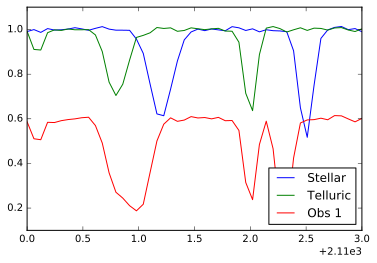

In [15]:

#s = figure(width=750, height=300, title=None)
s = plt.figure()
plt.plot(wavelength, stellar_lines, label="Stellar")
plt.plot(wavelength, telluric_lines,  label="Telluric")
#plt.plot(wavelength, combined_lines -.5)

plt.plot(wavelength, shift1 -.4, label="Obs 1")
#plt.plot(wavelength, shift2 -.5, label="Obs 2")

#plt.plot(wavelength, combined_lines)
#s.line(wavelength, combined_lines, color="red", line_width=1)

#s.title = "Example Spectra"
#s.xaxis.axis_label = 'Wavelength'
#s.yaxis.axis_label = 'Nomalized Flux'
#s.legend.location = "bottom_right"
#s.title_text_font_size = "14pt"
#s.xaxis.axis_label_text_font_size = "12pt"
#s.yaxis.axis_label_text_font_size = "12pt"
#s.set(x_range=Range1d(2116, 2122), y_range=Range1d(0.68, 1.04))

plt.legend(loc="lower right")
#plt.show(s)

In [16]:
# using bokeh
from bokeh.io import gridplot, output_file, show
from bokeh.plotting import figure
from bokeh.models.glyphs import Text


s1 = figure(width=400, height=200, title=None)
s1.line(wavelength, telluric_lines, legend="Telluric Model", color="black", line_width=2)
s1.xaxis.axis_label = 'Wavelength (nm)'
s1.yaxis.axis_label = 'Transmittance'
s1.legend.location = "bottom_right"
s1.title_text_font_size = "14pt"
s1.xaxis.axis_label_text_font_size = "12pt"
s1.yaxis.axis_label_text_font_size = "12pt"
s1.legend.border_line_color = None

s2 = figure(width=400, height=200, y_range=s1.y_range, title=None)
s2.line(range(len(shift1)), shift1, legend="Observation", color="black", line_width=2)
s2.xaxis.axis_label = 'Pixel Number'
s2.yaxis.axis_label = 'Normalized Intensity'
s2.legend.location = "bottom_right"
s2.legend.border_line_color = None

#glyph = Text(x="x", y="y", text="text", angle=0, text_color="#96deb3")
#plot.add_glyph(source, glyph)

p = gridplot([[s1], [s2]])

# show the results
show(p)


## Try use text glyph to add annotation to the peaks and plots.
